# preprocessing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from six.moves import cPickle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
%matplotlib inline

Definding function:

In [29]:
# this function give file of data  as numpy array or image

def getImageData(filename):
    f = open(filename,'rb')
    datadict = cPickle.load(f,encoding='latin1') #Why the hell latin1 ???
    f.close()
    X=datadict['data'].reshape((len(datadict['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    return X


# this function give file of data  as dictionary


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


#for show image in flatten form
def plotImage(X):
    plt.figure(figsize=(3, 3))
    plt.imshow(X.reshape(32,32,3))
    plt.show()
    plt.close()

# laod data

shape of input image: (10000, 32, 32, 3)
#############################################
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
shape of target vector: (10000, 10)


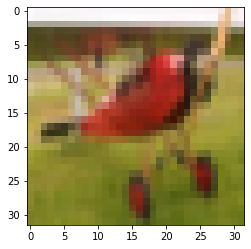

In [31]:
file='cifar-10-batches-py\data_batch_1'

X_image = getImageData(file)
x=unpickle(file)


print('shape of input image:',X_image.shape)
print('#############################################')
plt.imshow(X_image[35])


#geting vector  of target of data:
y=x[b'labels']
y_train=to_categorical(y)
print(y_train[35])
print('shape of target vector:',y_train.shape)

preprocessing---->PCA whitening

In [32]:
X = X_image.reshape(10000,-1)
x_norm= X/255
x_norm=x_norm-(x_norm.mean(axis=0))

In [33]:
cov = np.cov(x_norm, rowvar=False)

In [34]:
U,S,V = np.linalg.svd(cov)

In [35]:
epsilon = 0.1
X_ZCA = U.dot(np.diag(1.0/np.sqrt(S + epsilon))).dot(U.T).dot(x_norm.T).T

In [36]:
X_ZCA_rescaled = (X_ZCA - X_ZCA.min()) / (X_ZCA.max() - X_ZCA.min())

print ('min:', X_ZCA_rescaled.min())
print ('max:', X_ZCA_rescaled.max())

min: 0.0
max: 1.0


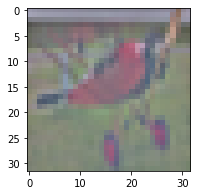

In [37]:
plotImage(X_ZCA_rescaled[35, :])

In [38]:
y_train[35]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Constructing model:

In [39]:
model=Sequential()


model.add(Dense(1000,activation='relu',input_dim=3072))
model.add(Dense(1000,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_5 (Dense)              (None, 1000)              1001000   
_________________________________________________________________
dense_6 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5010      
Total params: 4,579,510
Trainable params: 4,579,510
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [41]:
history=model.fit(X_ZCA,y_train,validation_split=0.1,batch_size=128,epochs=40)

Epoch 1/40
71/71 [==============================] - 1s 21ms/step - loss: 1.8728 - accuracy: 0.3317 - val_loss: 1.6627 - val_accuracy: 0.4020
Epoch 2/40
71/71 [==============================] - 1s 19ms/step - loss: 1.1734 - accuracy: 0.5888 - val_loss: 1.7199 - val_accuracy: 0.4260
Epoch 3/40
71/71 [==============================] - 1s 19ms/step - loss: 0.6199 - accuracy: 0.7894 - val_loss: 2.0908 - val_accuracy: 0.3940
Epoch 4/40
71/71 [==============================] - 1s 19ms/step - loss: 0.3101 - accuracy: 0.8930 - val_loss: 2.4213 - val_accuracy: 0.4030
Epoch 5/40
71/71 [==============================] - 1s 19ms/step - loss: 0.1913 - accuracy: 0.9347 - val_loss: 2.8113 - val_accuracy: 0.4130
Epoch 6/40
71/71 [==============================] - 1s 20ms/step - loss: 0.1465 - accuracy: 0.9504 - val_loss: 3.1673 - val_accuracy: 0.4080
Epoch 7/40
71/71 [==============================] - 1s 19ms/step - loss: 0.1484 - accuracy: 0.9520 - val_loss: 3.2649 - val_accuracy: 0.3970
Epoch 8/40
71

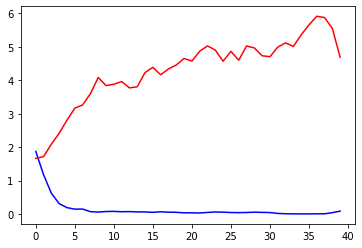

In [42]:
plt.plot(history.history['loss'],'b-')
plt.plot(history.history['val_loss'],'r-')
plt.show()

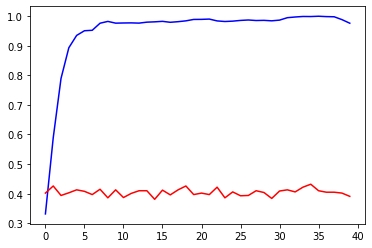

In [43]:
plt.plot(history.history['accuracy'],'b-')
plt.plot(history.history['val_accuracy'],'r-')
plt.show()

In [44]:
print('max acc of validation:',max(history.history['val_accuracy']))

max acc of validation: 0.4320000112056732


In [45]:
print('max acc of trian:',max(history.history['accuracy']))

max acc of trian: 0.9994444251060486
